In [1]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve 

In [2]:
#lendo os dados
dados = pd.read_csv('dados/titanic3.csv')

### Dicionário de dados:

- pclass: Classe na qual o passageiro viajava
- survived: Sobreviveu ou não sobreviveu a trajédia
- name: Nome do passageiro
- age: Idade do passageiro
- sibsp: Quantidade de irmãos e cônjujes do passageiro também na embarcação
- parch: Quantidade de crianças e idosos (pais) relativos ao passageiro
- ticket: Número do ticket do passageiro
- fare: Valor da tarifa paga pelo passageiro
- cabin: Identificador da cabine do passageiro
- embarket: Porto onde o passageiro embarcou
- boat: -
- body: Peso corporal do passageiro
- home.dest: Destino final do passageiro

In [3]:
#Visualizando as variáveis
dados.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#Tipos de variáveis
dados.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
#Tenho dados faltantes?
print(dados.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [6]:
#interpretação do sumário
dados.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


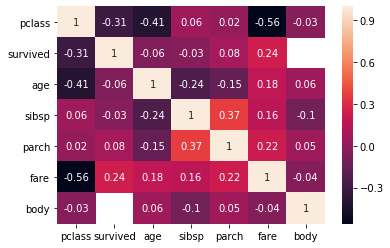

In [7]:
# Análise de correlação
matriz_correlacao = dados.corr().round(2)
sn.heatmap(data = matriz_correlacao,annot = True)

In [8]:
#Preparando os dados para o modelo, excluindo as colunas que não me parecem relevantes para avaliar 
#a probabilidade da pessoa sobreviver ao acidente
dados_modelo = dados[['pclass','survived','sex','age']]
dados_modelo.head()

,pclass,survived,sex,age
0,1,1,female,29.00
1,1,1,male,0.92
2,1,0,female,2.00
3,1,0,male,30.00
4,1,0,female,25.00


In [9]:
#Tenho dados faltantes nos dados do modelo?
print(dados_modelo.isnull().sum())

pclass        0
survived      0
sex           0
age         263
dtype: int64


In [10]:
#removendo as linhas com dados faltantes para não atrapalhar o modelo
dados_modelo_clean = dados_modelo.dropna()
dados_modelo_clean.shape # Temos linhas suficientes para treinar o modelo

(1046, 4)

In [11]:
#O modelo precisa da variáveis dummy nos tipos categóricos (no caso, sex)
dados_modelo_clean = pd.get_dummies(dados_modelo_clean)

In [12]:
#Criando o modelo. Vamos usar uma regressão logística
preditores = dados_modelo_clean[['pclass', 'sex_male', 'sex_female','age']]
alvo = dados_modelo_clean['survived']
preditores

,pclass,sex_male,sex_female,age
0,1,0,1,29.00
1,1,1,0,0.92
2,1,0,1,2.00
3,1,1,0,30.00
4,1,0,1,25.00
5,1,1,0,48.00
6,1,0,1,63.00
7,1,1,0,39.00
8,1,0,1,53.00
9,1,1,0,71.00


In [13]:
#Vamos criar um conjunto de treino e um conjunto de testes
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

#### Regressão Logística

In [14]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_previsto = modelo_reglog.predict(preditores_teste)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


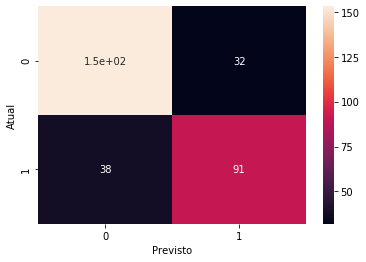

In [15]:
#Avaliando o modelo
matriz_confusao = pd.crosstab(alvo_teste, alvo_previsto, rownames=['Atual'], colnames=['Previsto'])
sn.heatmap(matriz_confusao, annot=True)

In [16]:
#Métricas de avaliação
print("Acurácia: ", metrics.accuracy_score(alvo_teste, alvo_previsto).round(2))
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_previsto).round(2))
print('Revocação: ', metrics.recall_score(alvo_teste, alvo_previsto).round(2))
print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_previsto).round(2))
print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_previsto).round(2))

Acurácia:  0.78
Precisão:  0.74
Revocação:  0.71
F1-Measure:  0.72
ROC AUC:  0.77


In [17]:
#Supondo que precisamos avaliar a quantidade de pessoas que não irão sobreviver para assegurar um capital de uma seguradora,
#precisamos minimizar a quantidade de falso negativos (pessoas que morreram mas foram previstas como sobreviventes), então
#a métrica de REVOCAÇÃO é a que deve ser utilizada

#### Arvore de Decisão

In [18]:
#Vamos fazer usando a árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [19]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

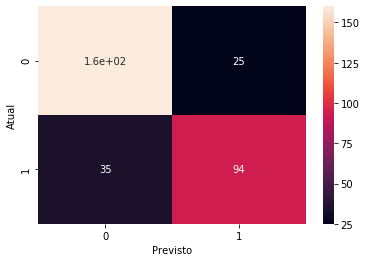

In [20]:
matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

In [21]:
print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao).round(2))

Revocação:  0.73


In [22]:
#Como a árvore teve um indice de recovação melhor que o da regressão, o algorítimo mais adequado é a árvore

#### Floresta de Decisão

In [23]:
#Vamos testar agora com a floresta
from sklearn.ensemble import RandomForestClassifier 

# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta_decisao = floresta.fit(preditores_treino, alvo_treino)

# Prevê a partir dos preditores de testes
floresta_previsao = floresta_decisao.predict(preditores_teste)

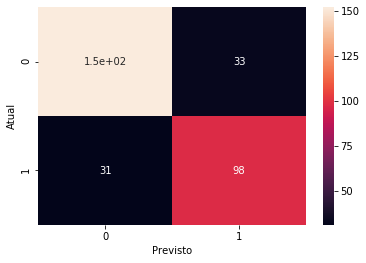

In [24]:
matriz_confusao_floresta = pd.crosstab(alvo_teste, floresta_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_floresta, annot=True)

In [25]:
print('Revocação: ', metrics.recall_score(alvo_teste, floresta_previsao).round(2))

Revocação:  0.76


In [26]:
#Como a floresta teve um indice de recovação melhor que o da árvore, o algorítimo mais adequado é a floresta

In [27]:
#Verificando a importancia das variáveis
floresta_decisao.feature_importances_.round(2)

array([0.15, 0.2 , 0.21, 0.44])

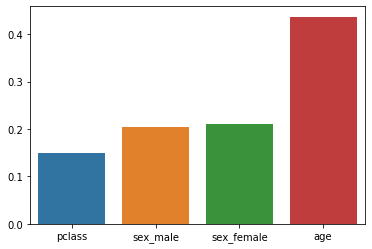

In [28]:
feature_importances = {"feature":preditores.columns,"importance":floresta_decisao.feature_importances_}
sn.barplot(y="importance",x="feature",data=feature_importances)

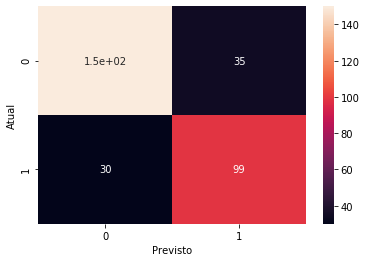

In [29]:
#Vamos testar removendo o pclass dos preditores
preditores2 = dados_modelo_clean[['sex_male', 'sex_female','age']]
preditores_treino2, preditores_teste2, alvo_treino2, alvo_teste2 = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

# Treinamento do modelo
floresta_decisao = floresta.fit(preditores_treino2, alvo_treino2)

# Prevê a partir dos preditores de testes
floresta_previsao2 = floresta_decisao.predict(preditores_teste2)

matriz_confusao_floresta2 = pd.crosstab(alvo_teste2, floresta_previsao2, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_floresta2, annot=True)

In [30]:
print('Revocação: ', metrics.recall_score(alvo_teste2, floresta_previsao2).round(2))

Revocação:  0.77


In [31]:
#O teste de recovação foi pior. Vamos manter a variável pclass

#### Plotando o ROC

In [32]:
def plot_roc_curve(fper, tper, title):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positivo')
    plt.title(title)
    plt.legend()
    plt.show()

In [33]:
def plot_roc_curves(fper1, tper1, title1,fper2, tper2, title2,fper3, tper3, title3):  
    plt.plot(fper1, tper1, color='orange', label=title1)
    plt.plot(fper2, tper2, color='green', label=title2)
    plt.plot(fper3, tper3, color='red', label=title3)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positivo')
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [47]:
#Calculado o AUC ROC e sua curva para avaliar o modelo da floresta
probs = floresta.predict_proba(preditores_teste)  
probs = probs[:, 1]  
fper1, tper1, thresholds = roc_curve(alvo_teste , probs) 
roc_auc1 = metrics.auc(fper1, tper1)
print ("AUC=",roc_auc1.round(2))
#plot_roc_curve(fper1, tper1,'Floresta - (ROC) Curve')

AUC= 0.84


In [48]:
#Calculado o AUC ROC e sua curva para avaliar o modelo da floresta
probs = modelo_reglog.predict_proba(preditores_teste)  
probs = probs[:, 1]  
fper2, tper2, thresholds2 = roc_curve(alvo_teste , probs) 
roc_auc2 = metrics.auc(fper2, tper2)
print ("AUC=",roc_auc2.round(2))
#plot_roc_curve(fper2, tper2,'Logisica - (ROC) Curve')

AUC= 0.83


In [49]:
#Calculado o AUC ROC e sua curva para avaliar o modelo da floresta
probs = dt.predict_proba(preditores_teste)  
probs = probs[:, 1]  
fper3, tper3, thresholds3 = roc_curve(alvo_teste , probs) 
roc_auc3 = metrics.auc(fper3, tper3)
print ("AUC=",roc_auc3.round(2))
#plot_roc_curve(fper3, tper3,'Árvore - (ROC) Curve')

AUC= 0.82


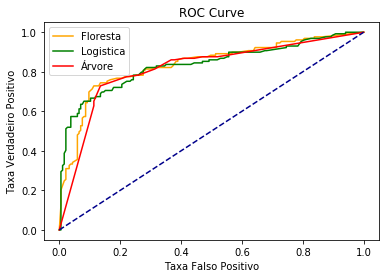

In [42]:
#Plota as 3 curvas ao mesmo tempo
plot_roc_curves(fper1, tper1,'Floresta',fper2, tper2,'Logistica',fper3, tper3,'Árvore')

In [43]:
#uma curva próxima a linha pontilhada significa um modelo que não é melhor que uma escolha aleatoria (50% para cada caso).
#Quanto mais afastado da linha pontilhada melhor. o AUC é a área da curva. Quanto maior melhor